In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('regression_data1.csv')

In [3]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


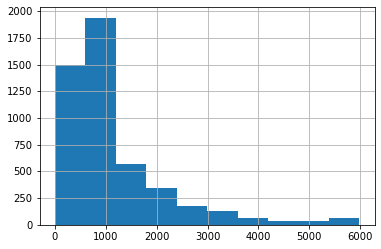

In [4]:
data['HV1'].hist()
plt.show()


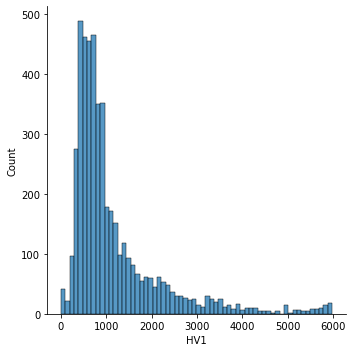

In [5]:
sns.displot(data['HV1'])
plt.show()


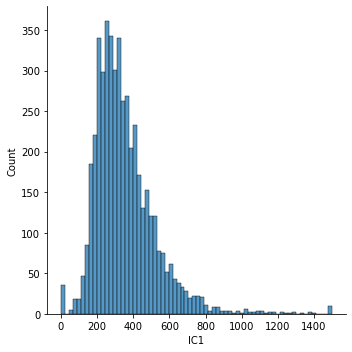

In [6]:
sns.displot(data['IC1'])
plt.show()


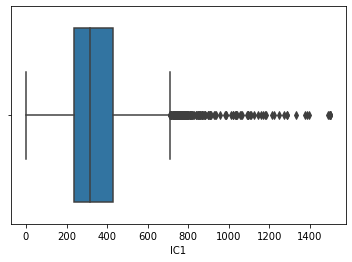

In [7]:
sns.boxplot(x=data['IC1'])
plt.show()


In [8]:
# removing the outliers from IC1 - we don't always do it, only for good reasons
# but if we want to do it, this is how:
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25)
upper_limit = np.percentile(data['IC1'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC1'],25) - 1.5*iqr


In [9]:
lower_limit

-43.0

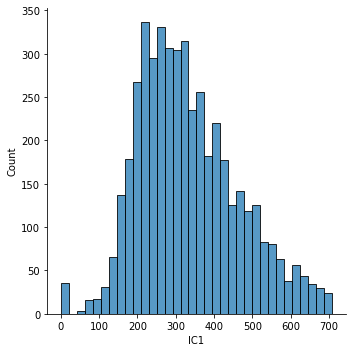

In [10]:
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]
sns.displot(data['IC1'])
plt.show()




In [11]:
#Activity 1
# Draw a box plot for the IC2.
# Print the descriptive statistics for IC2.
# Remove the outliers from the column IC2.

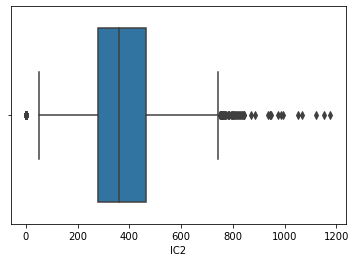

In [12]:
sns.boxplot(x=data['IC2'])
plt.show()

In [13]:
data['IC2'].describe()

count    4670.000000
mean      380.943255
std       141.325353
min         0.000000
25%       280.000000
50%       361.000000
75%       465.000000
max      1177.000000
Name: IC2, dtype: float64

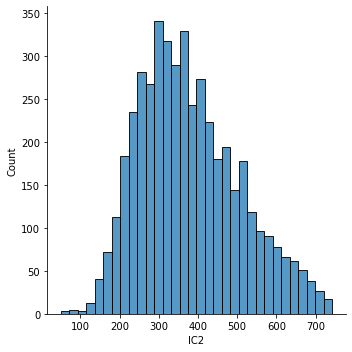

In [14]:
iqr = np.percentile(data['IC2'],75) - np.percentile(data['IC2'],25)
upper_limit = np.percentile(data['IC2'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC2'],25) - 1.5*iqr
data = data[(data['IC2']>lower_limit) & (data['IC2']<upper_limit)]
sns.displot(data['IC2'])
plt.show()

In [15]:
data.shape


(4574, 8)

In [16]:

#End Acivity1

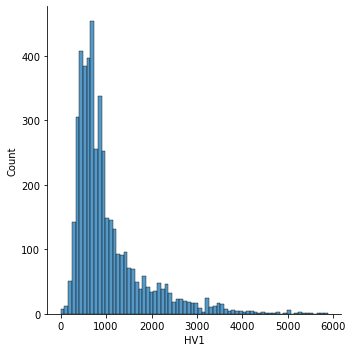

In [17]:

sns.displot(data['HV1'])
plt.show()

In [18]:
#np.log10(0)

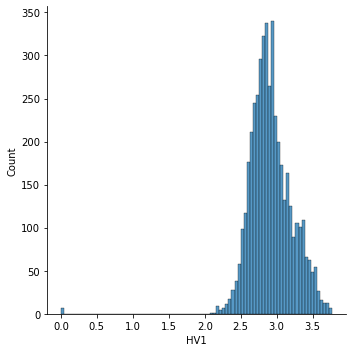

In [19]:
# Log tranformation: reduce range of 0 - 100000 to a range of 0-5

# Code to test how the transformation will look like.
# Here we are trying two different codes. Notice that in the first function
# we are replacing the -inf values after we take logarithm by 0 while in
# the second case we will replace them with np.NaN. The idea is that
# we will then replace those NaN values in the column with the mean or
# median of the column

def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
HV1_log = data['HV1'].apply(lambda x :log_transfom_clean1(x))
sns.displot(HV1_log)
plt.show()

<ipython-input-20-fd27406b9ee6>:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


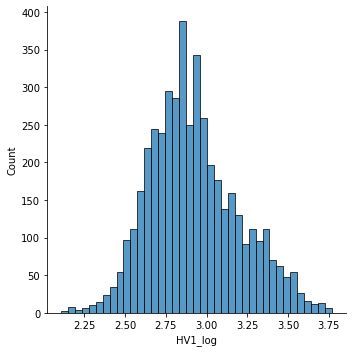

In [20]:
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with the mean later
data['HV1_log'] = list(map(log_transfom_clean2, data['HV1']))
# Now we replace the NAN by the mean
data['HV1_log'] = data['HV1_log'].fillna(np.mean(data['HV1_log']))
sns.displot(data['HV1_log'])
plt.show()

In [21]:
#data = data.drop(['HV1'], axis=1)
#data.head()

In [22]:
# Activity 2
# Repeat the process(log transformation) for the column IC3. Define the function again yourself.
# Remove the tails of the transformed column to make it closer to the normal distribution.
# This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

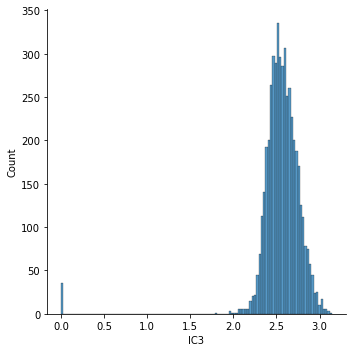

In [40]:
# 1
def log_transfom_clean3(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

IC3_log = data['IC3'].apply(lambda x :log_transfom_clean3(x))
sns.displot(IC3_log)
plt.show()


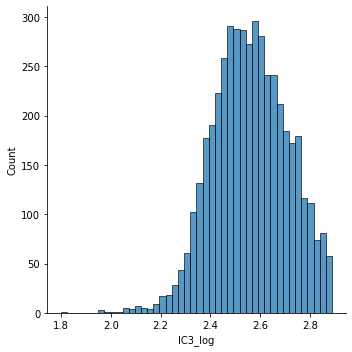

In [42]:
# 2
#def log_transfom_clean4(x):
#    x = np.log10(x)
#    if np.isfinite(x):
#        return x
#    else:
#        return np.NAN 
#data['IC3_log'] = list(map(log_transfom_clean4, data['IC3']))
#data['IC3_log'] = data['IC3_log'].fillna(np.mean(data['IC3_log']))

iqr = np.percentile(data['IC3'],75) - np.percentile(data['IC3'],25)
upper_limit = np.percentile(data['IC3'],75) + 1.5*iqr
lower_limit = np.percentile(data['IC3'],25) - 1.5*iqr
data = data[(data['IC3']>lower_limit) & (data['IC3']<upper_limit)]
sns.displot(data['IC3_log'])
plt.show()


In [25]:
#End Activity 2

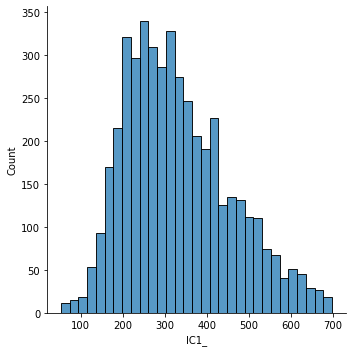

In [26]:
# BoxCox transformation - another one of many transforms, to get the data more like normal

# BoxCox does not like nagative values
#Since this is median household income, we can filter out negative values:
len(data[data['IC5']<=0])  # number of such observations.
# if you do not want to lose this data, replace it with the mean of the column
data['IC1_'] = np.where(data['IC1']<=0,0,data['IC1'])

# now calculate mean of the new column , excluding zeros in the count
mean = np.sum(data['IC1_'])/len(data[data['IC1_']>0])

data['IC1_'] = data['IC1_'].replace(0,mean)
# data = data.drop(['IC1'], axis=1)
sns.displot(data['IC1_'])
plt.show()

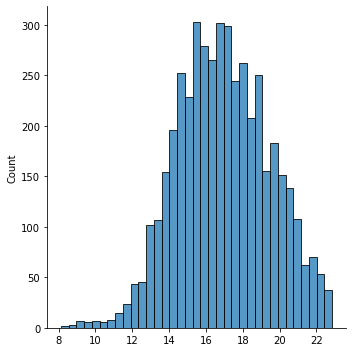

In [27]:
from scipy import stats
xt, lmbda = stats.boxcox(data['IC1_'])
sns.displot(xt)
plt.show()

In [28]:
#Activity 3
# Repeat the same steps for column IC5 for box-cox transformation.

In [29]:
# Repeat the same steps for column 'IC5'
# for box cox transformation, we can also use sklearn's preprocessing module. It will be introduced later



In [30]:
#NOTE: the transformations that we did before, aim to make the distributions more like a normal distribution
# While there are numeric modelling methods that require this, Linear Regression is not one of them.
# LR only requires the error terms to be normally ditributed.
# we still wanted to show these transformations as they might come in handy.

In [44]:
# Normalizing ( ) and scaling ()
data = pd.read_csv('regression_data1.csv') 
display(data.head())
data.shape

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


(4843, 8)

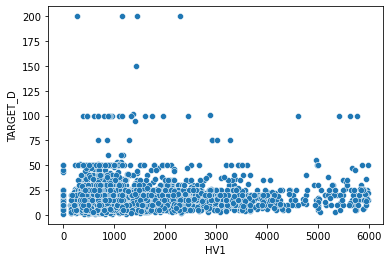

In [32]:
sns.scatterplot(x=data['HV1'], y=data['TARGET_D'])
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [46]:
X_num

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,2346,420,446,468,503,14552,15.500000
1,497,350,364,357,384,11696,3.080000
2,1229,469,502,507,544,17313,7.500000
3,325,148,181,171,209,6334,6.700000
4,768,174,201,220,249,7802,8.785714
...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000
4839,3357,284,455,343,447,24240,11.857143
4840,700,322,415,356,446,14360,11.333333
4841,601,206,225,251,289,9801,13.000000


In [47]:
X_cat

""
0
1
2
3
4
...
4838
4839
4840
4841


In [57]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)   
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,0.392177,0.280000,0.297333,0.335725,0.360832,0.083382,0.029569
1,0.083083,0.233333,0.242667,0.256098,0.275466,0.067017,0.001829
2,0.205450,0.312667,0.334667,0.363702,0.390244,0.099202,0.011701
3,0.054330,0.098667,0.120667,0.122669,0.149928,0.036293,0.009915
4,0.128385,0.116000,0.134000,0.157819,0.178623,0.044705,0.014573
...,...,...,...,...,...,...,...
4838,0.117185,0.198000,0.223333,0.290531,0.335725,0.087427,0.029569
4839,0.561184,0.189333,0.303333,0.246055,0.320660,0.138893,0.021433
4840,0.117018,0.214667,0.276667,0.255380,0.319943,0.082281,0.020263
4841,0.100468,0.137333,0.150000,0.180057,0.207317,0.056159,0.023985


In [55]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1 if you have normally distributed data
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,1.145640,0.392017,0.241382,0.402231,0.322435,-0.203394,0.361021
1,-0.646030,-0.016528,-0.207586,-0.263776,-0.351134,-0.504086,-0.862998
2,0.063274,0.677998,0.547994,0.636234,0.554505,0.087295,-0.427397
3,-0.812697,-1.195472,-1.209550,-1.379790,-1.341676,-1.068619,-0.506239
4,-0.383432,-1.043726,-1.100046,-1.085786,-1.115266,-0.914062,-0.300687
...,...,...,...,...,...,...,...
4838,-0.448355,-0.325855,-0.366367,0.024227,0.124327,-0.129064,0.361021
4839,2.125293,-0.401727,0.290659,-0.347777,0.005462,0.816598,0.002009
4840,-0.449324,-0.179946,0.071650,-0.269776,-0.000199,-0.223609,-0.049613
4841,-0.545254,-0.856963,-0.968641,-0.899784,-0.888857,-0.703599,0.114640


In [71]:
#Activity 4

# Keep using the same file (regression_data1.csv) for this exercise.

# Load data regression_data1.csv.
# Select 3 numeric columns.
# Plot distributions.
# Normalize using min max scaler
# Plot the distributions again.
# do the same for standard scaler
data = pd.read_csv('regression_data1.csv') 
display(data.head())
data.shape

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


(4843, 8)

In [73]:
data2 = df._get_numeric_data().iloc[:, 0:3].dropna()

NameError: name 'df' is not defined

In [67]:
# 1
sns.scatterplot(x=data2['IC1'], y=data2['TARGET_D'])
plt.show()

NameError: name 'data2' is not defined

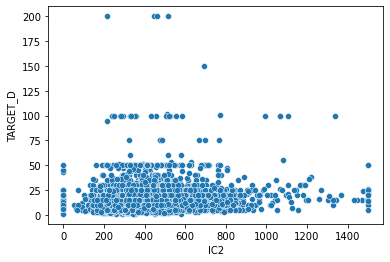

In [60]:
sns.scatterplot(x=data['IC2'], y=data['TARGET_D'])
plt.show()

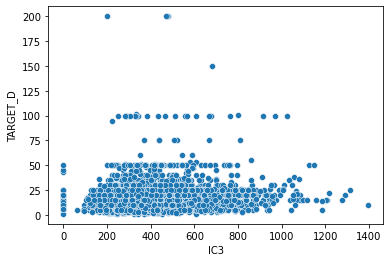

In [61]:
sns.scatterplot(x=data['IC3'], y=data['TARGET_D'])
plt.show()

In [65]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)   
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(4843, 7)


,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,0.392177,0.280000,0.297333,0.335725,0.360832,0.083382,0.029569
1,0.083083,0.233333,0.242667,0.256098,0.275466,0.067017,0.001829
2,0.205450,0.312667,0.334667,0.363702,0.390244,0.099202,0.011701
3,0.054330,0.098667,0.120667,0.122669,0.149928,0.036293,0.009915
4,0.128385,0.116000,0.134000,0.157819,0.178623,0.044705,0.014573
...,...,...,...,...,...,...,...
4838,0.117185,0.198000,0.223333,0.290531,0.335725,0.087427,0.029569
4839,0.561184,0.189333,0.303333,0.246055,0.320660,0.138893,0.021433
4840,0.117018,0.214667,0.276667,0.255380,0.319943,0.082281,0.020263
4841,0.100468,0.137333,0.150000,0.180057,0.207317,0.056159,0.023985


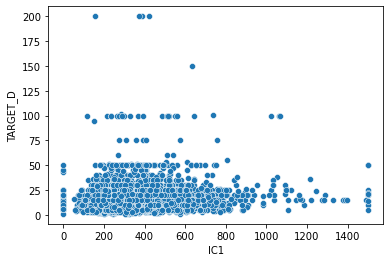

In [66]:
# 1
sns.scatterplot(x=data['IC1'], y=data['TARGET_D'])
plt.show()

In [ ]:
#data2=df._get_numeric_data().iloc[:, 0:3].dropna()


In [ ]:
# same for the three columns



In [ ]:
# End Activity 4